# Klasifikasi Tingkat Obesitas Berdasarkan Body Mass Index dengan Menggunakan Metode Random Forest Classifier

- KELOMPOK 1:
  - Difa Farhani Hakim (1306620040)
  - Huffaz Muhammad Abdurrofi Baith (1306620075)
  - Muhammad Rizky Anugrah (1306620089)
- Kelas          : Fisika - B
- Angkatan       : 2020
- Dosen Pengampu : Dr.rer.nat. Bambang Heru Iswanto

# METADATA

- Data didapatkan dari kaggle dengan link sebagai berikut:
  https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels
- Memiliki 2 data dengan format .arff dan .csv
- Judul data nya ialah ObesityDataSet_raw_and_data_sinthetic.arff dan ObesityDataSet_raw_and_data_sinthetic.csv
- Dataset ini berisi data tentang obesitas pada individu dari Kolombia, Peru, dan Meksiko. Dataset ini terdiri dari 17 atribut dan 2111 rekaman. Rekaman tersebut diberi label dengan variabel kelas NObesity (Tingkat Obesitas) yang memungkinkan klasifikasi data.
- Dataset ini dihasilkan dari penelitian yang bertujuan untuk memprediksi tingkat obesitas pada individu berdasarkan kebiasaan makan dan kondisi fisiknya. Penelitian ini dilakukan pada individu dari tiga negara yaitu Kolombia, Peru, dan Meksiko. Dataset ini terdiri dari 2111 rekaman dengan 17 atribut yang meliputi jenis kelamin, usia, tinggi badan, berat badan, riwayat keluarga yang mengalami obesitas, frekuensi konsumsi makanan kalori tinggi, frekuensi konsumsi sayuran, jumlah makan utama dalam sehari, konsumsi makanan di antara waktu makan utama, kebiasaan merokok, konsumsi air putih harian, pemantauan konsumsi kalori, frekuensi aktivitas fisik, waktu penggunaan perangkat teknologi, konsumsi alkohol dan jenis transportasi yang digunakan.
- Owner dataset ini adalah Ankur Bajaj (Owner).
- Ukuran data yaitu 2111 baris dan 17 kolom.
- Terdiri dari 16 features dan 1 data label atau target.

Attribute Information
1. Gender
2. Age
3. Height
4. Weight
5. family_history_with_overweight
6. FAVC (Frecuent consumption of high caloric foods)
7. FCVC (Frequency of consumption of vegetables)
8. NCP (Number of main meals)
9. CAEC (Consumption of food between meals)
10. SMOKE (Smoking habit)
11. CH2O (Consumption of water daily)
12. SCC (Calories consumption monitoring)
13. FAF (Physical activity frequency)
14. TUE (Time using technology devices)
15. CALC (Consumption of alcohol)
16. MTRANS (Transportation used)
17. NObeyesdad (Number of Obesity Diseases)

# IMPORT

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

plt.style.use('ggplot')
pd.set_option('max_columns', 100)


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
file_path = 'ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)

# Preprocessing and Exploratory Data Analysis (EDA)

# Preprocessing

In [3]:
data = data.rename(columns={'family_history_with_overweight': 'FHWO',
                           'NObeyesdad' : 'BMI',})

In [4]:
data.shape

(2111, 17)

In [5]:
data.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  2111 non-null   object 
 1   Age     2111 non-null   float64
 2   Height  2111 non-null   float64
 3   Weight  2111 non-null   float64
 4   FHWO    2111 non-null   object 
 5   FAVC    2111 non-null   object 
 6   FCVC    2111 non-null   float64
 7   NCP     2111 non-null   float64
 8   CAEC    2111 non-null   object 
 9   SMOKE   2111 non-null   object 
 10  CH2O    2111 non-null   float64
 11  SCC     2111 non-null   object 
 12  FAF     2111 non-null   float64
 13  TUE     2111 non-null   float64
 14  CALC    2111 non-null   object 
 15  MTRANS  2111 non-null   object 
 16  BMI     2111 non-null   object 
dtypes: float64(8), object(9)
memory usage: 280.5+ KB


In [7]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
col = data.columns
col

Index(['Gender', 'Age', 'Height', 'Weight', 'FHWO', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI'],
      dtype='object')

In [9]:
data.isnull().sum()

Gender    0
Age       0
Height    0
Weight    0
FHWO      0
FAVC      0
FCVC      0
NCP       0
CAEC      0
SMOKE     0
CH2O      0
SCC       0
FAF       0
TUE       0
CALC      0
MTRANS    0
BMI       0
dtype: int64

## Data Preparation Reports

- Attribute = 17
- Ukuran data : 2111
- Fitur : 16
- Label/ Target = 1
- Target: Tingkatan Obesitas (BMI)
- Jumlah null/data yang kosong disetiap kolom: 0

# Unique Value Atribute

In [10]:
object_cols = [col for col in data.columns if data[col].dtype == "object"]

good_label_cols = [col for col in object_cols if set(data[col]).issubset(set(data[col]))]
good_label_cols.remove('BMI')

print('Categorical columns that will be ordinal encoded:', good_label_cols)

Categorical columns that will be ordinal encoded: ['Gender', 'FHWO', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [11]:
printf = 'Value Unique {}:\n {} \n'

for count, i in enumerate(object_cols):
    val_count = data['{}'.format(i)].value_counts()
    print(count, printf.format(i, val_count))

0 Value Unique Gender:
 Male      1068
Female    1043
Name: Gender, dtype: int64 

1 Value Unique FHWO:
 yes    1726
no      385
Name: FHWO, dtype: int64 

2 Value Unique FAVC:
 yes    1866
no      245
Name: FAVC, dtype: int64 

3 Value Unique CAEC:
 Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64 

4 Value Unique SMOKE:
 no     2067
yes      44
Name: SMOKE, dtype: int64 

5 Value Unique SCC:
 no     2015
yes      96
Name: SCC, dtype: int64 

6 Value Unique CALC:
 Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64 

7 Value Unique MTRANS:
 Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64 

8 Value Unique BMI:
 Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight   

In [12]:
col_isna = data.isnull().sum().to_list()
for count, i in enumerate(col_isna):
    print(count, '{:15}'.format(col[count]), i)

0 Gender          0
1 Age             0
2 Height          0
3 Weight          0
4 FHWO            0
5 FAVC            0
6 FCVC            0
7 NCP             0
8 CAEC            0
9 SMOKE           0
10 CH2O            0
11 SCC             0
12 FAF             0
13 TUE             0
14 CALC            0
15 MTRANS          0
16 BMI             0


## Transformation

In [13]:
data.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [14]:
data_transform = data.copy()
ordinal_encoder = OrdinalEncoder()
data_transform[good_label_cols] = ordinal_encoder.fit_transform(data_transform[good_label_cols])

In [15]:
dic_to_replace = {"BMI": {"Insufficient_Weight": 0, 
                          "Normal_Weight": 1,
                         'Overweight_Level_I': 2,
                          'Overweight_Level_II': 3,
                          'Obesity_Type_I': 4,
                          'Obesity_Type_II': 5,
                          'Obesity_Type_III': 6,}
                         }
data_transform.replace(dic_to_replace, inplace=True)

In [16]:
data_transform

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,0.000000,1.000000,3.0,3.0,1
1,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,2.0,1.0,3.000000,1.0,3.000000,0.000000,2.0,3.0,1
2,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,2.000000,1.000000,1.0,3.0,1
3,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,2.0,0.0,2.000000,0.0,2.000000,0.000000,1.0,4.0,2
4,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,2.0,0.0,2.000000,0.0,0.000000,0.000000,2.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,2.0,0.0,1.728139,0.0,1.676269,0.906247,2.0,3.0,6
2107,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,2.0,0.0,2.005130,0.0,1.341390,0.599270,2.0,3.0,6
2108,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,2.0,0.0,2.054193,0.0,1.414209,0.646288,2.0,3.0,6
2109,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,2.0,0.0,2.852339,0.0,1.139107,0.586035,2.0,3.0,6


In [17]:
data_transform.describe()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230,3.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


## Data Transformation Reports

- Data dengan tipe object berjumlah 8 attribute yaitu 'Gender', 'FHWO', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'BMI'
- Data target/label dengan tipe object yaitu 'BMI'
- Semua data features dengan tipe object ditransform encoding dengan menggunakan class OrdinalEncoder yang terdapat di library sklearn.preprocessing
- Data target  di transformasi menggunakan encoding manual yaitu mengubah variabel yang terdapat di kolom target atau BMI menjadi bentuk numerik angka 0 hingga 6.
- Transformation encoding dilakukan agar dapat diproses oleh algoritma machine learning.

# Exploratory Data Analysis (EDA)

## Data Visualization

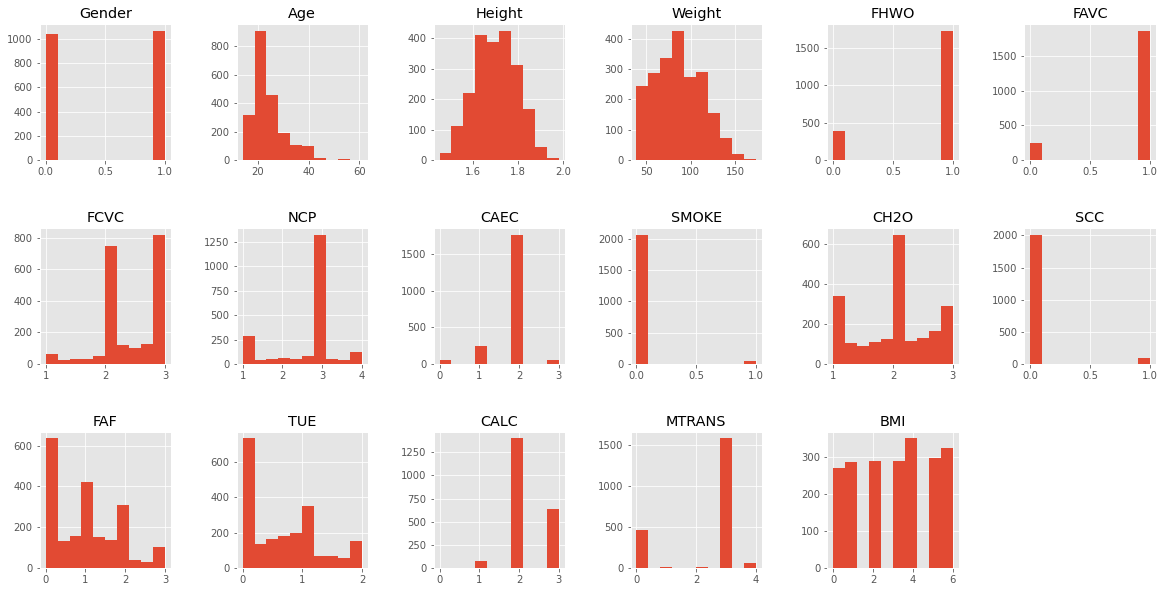

In [18]:
# Menghitung jumlah baris dan kolom yang dibutuhkan
n_cols = len(data_transform.columns)
n_rows = math.ceil(n_cols/6)

# Mengatur ukuran figure
fig, axes = plt.subplots(nrows=n_rows, ncols=6, figsize=(20, 10))

# Mengatur jarak antar subplot
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Menampilkan histogram pada setiap kolom
for i, ax in enumerate(axes.flatten()):
    if i < n_cols:
        ax.hist(data_transform.iloc[:, i], bins=10)
        ax.set_title(data_transform.columns[i])
    else:
        fig.delaxes(ax) # Menghapus subplot yang tersisa

# Menampilkan grafik
plt.show()

<AxesSubplot:xlabel='FAVC', ylabel='count'>

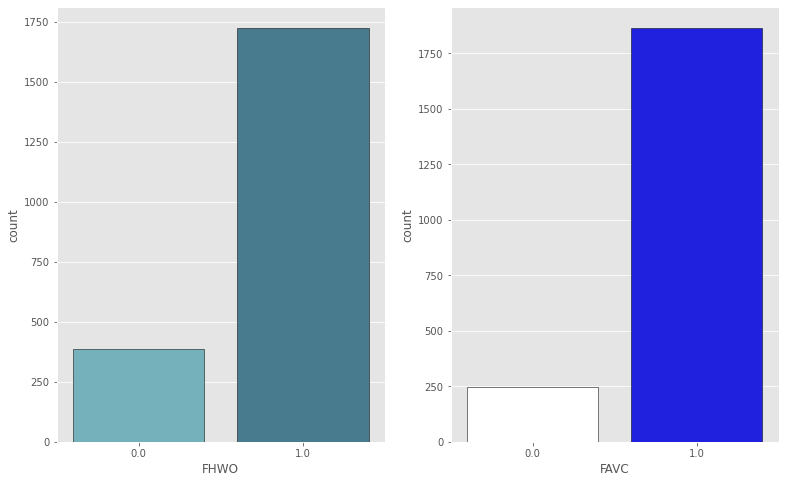

In [19]:
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.countplot(x= 'FHWO', data = data_transform, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'FAVC', data = data_transform, palette="flag",edgecolor="black")
#plt.savefig('count1.png', bbox_inches='tight',pad_inches=0)

<AxesSubplot:xlabel='SMOKE', ylabel='count'>

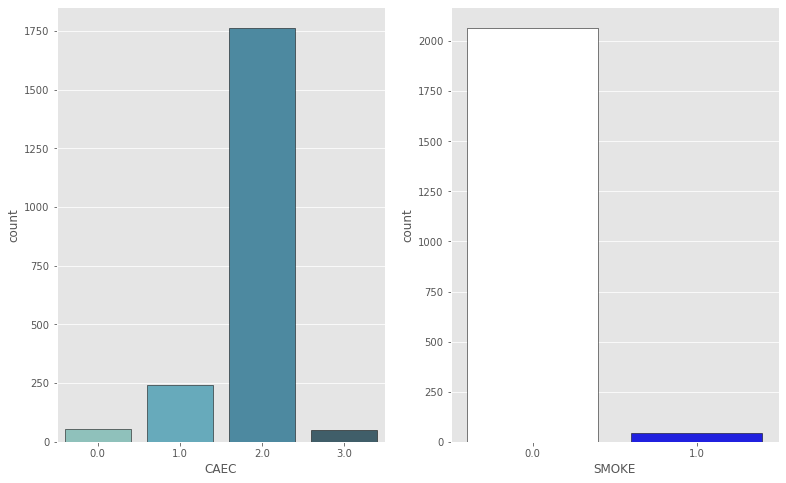

In [20]:
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.countplot(x= 'CAEC', data = data_transform, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'SMOKE', data = data_transform, palette="flag",edgecolor="black")
#plt.savefig('count2.png', bbox_inches='tight',pad_inches=0)

<AxesSubplot:xlabel='MTRANS', ylabel='count'>

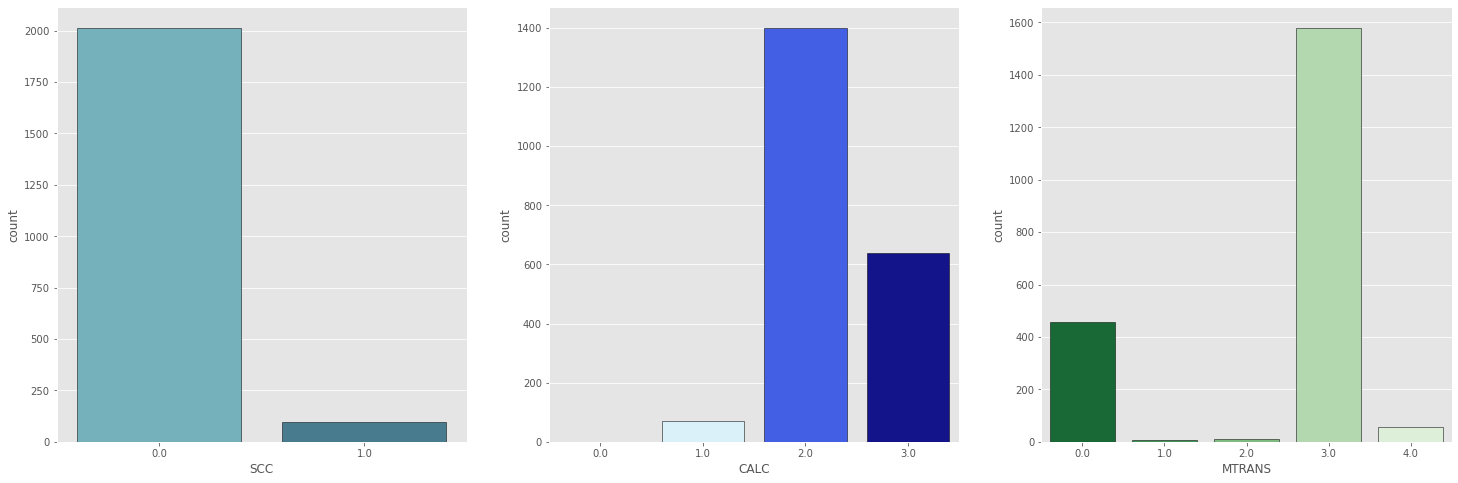

In [21]:
plt.figure(figsize=(25,8))
plt.subplot(131)
sns.countplot(x= 'SCC', data = data_transform, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'CALC', data = data_transform, palette="flag",edgecolor="black")
plt.subplot(133)
sns.countplot(x= 'MTRANS', data = data_transform, palette="Greens_r",edgecolor="black")
#plt.savefig('count3.png', bbox_inches='tight',pad_inches=0)

Text(0.5, 1.0, 'Distribusi data')

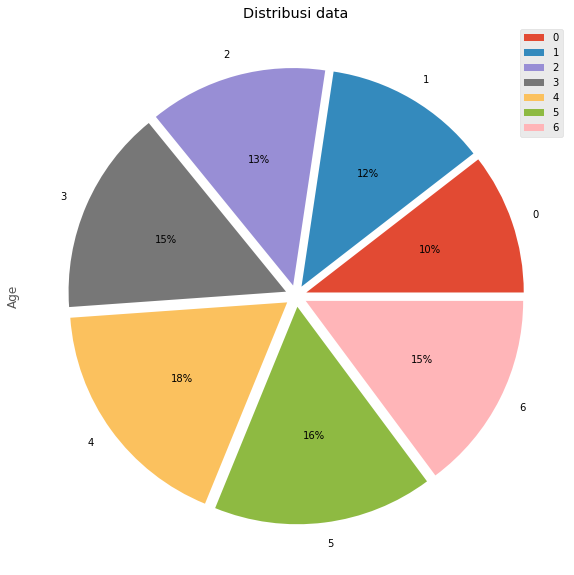

In [22]:
data_pie = data_transform.groupby(['BMI']).sum()
data_pie.plot(kind='pie', y='Age', 
              autopct='%1.0f%%', explode=[0.05]*7, 
              figsize=(10,10))
plt.legend(loc='upper right')
plt.title('Distribusi data')
#plt.savefig('Distribusi_pie.png')

In [23]:
corr = data_transform.corr()

<AxesSubplot:>

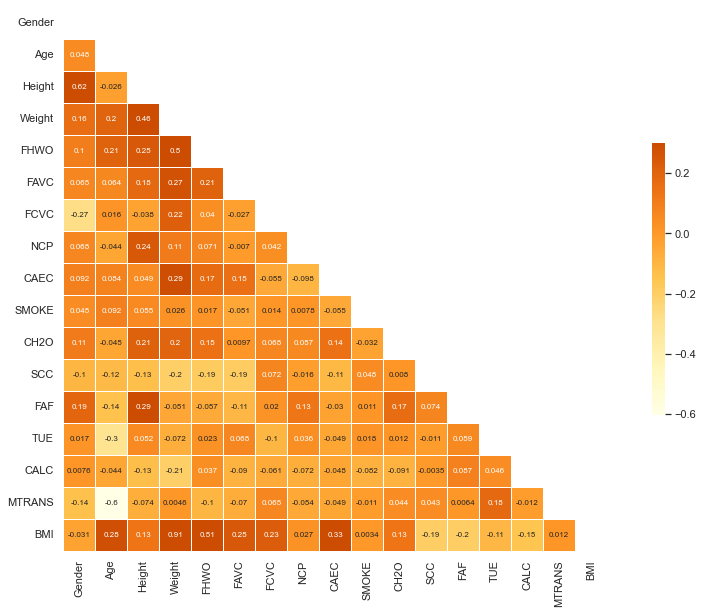

In [24]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(16, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot = True, annot_kws={"size": 8})
#plt.savefig('correlation.png', bbox_inches='tight',pad_inches=0)

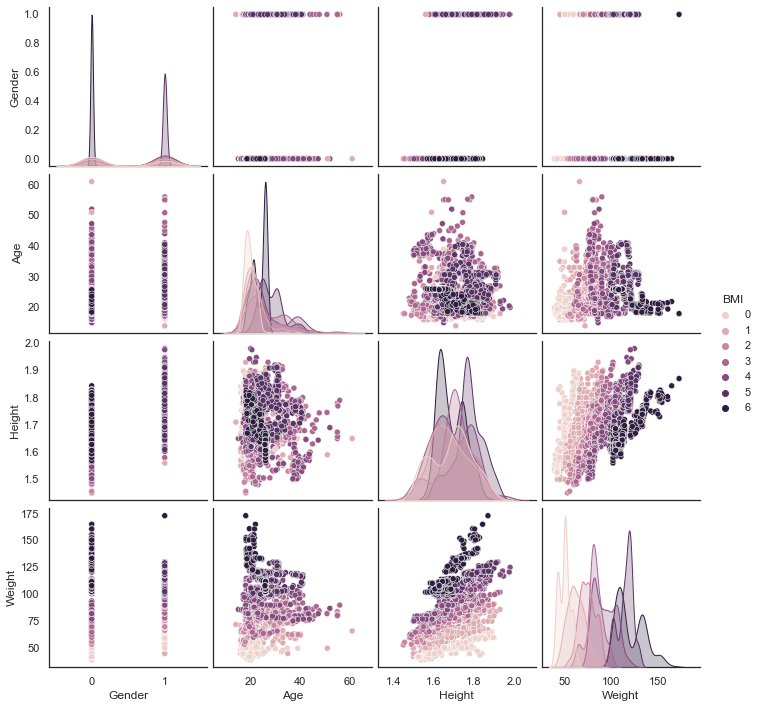

In [25]:
sns.pairplot(data_transform, 
             hue ='BMI', 
             vars = ['Gender','Age', 
                     'Height', 'Weight'])
#plt.savefig('pairplot1.png')

## Balancing

In [26]:
data_input = data_transform.copy()

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6')]

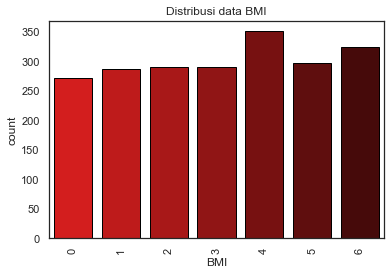

In [27]:
ax = sns.countplot(x = "BMI",data=data_input, palette="flag",edgecolor="black")
plt.title('Distribusi data BMI')
sns.set(font_scale=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#plt.savefig('Distribusi_hist.png')

In [28]:
data_grouped_by = data_input.groupby(['BMI'])
data_balanced = data_grouped_by.apply(lambda x: x.sample(data_grouped_by.size().min()).reset_index(drop=True))
data_bal = data_balanced.droplevel(['BMI'])
data_bal

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,1.0,18.000000,1.701650,50.157707,1.0,1.0,1.757466,3.000000,2.0,0.0,1.153559,0.0,0.833976,1.616045,2.0,3.0,0
1,0.0,19.000000,1.564199,42.096062,0.0,1.0,3.000000,1.894384,2.0,0.0,2.456581,1.0,1.596576,0.997400,3.0,3.0,0
2,0.0,19.434709,1.525691,42.000000,0.0,1.0,3.000000,1.000000,1.0,0.0,1.764055,0.0,0.000000,0.560887,2.0,3.0,0
3,0.0,19.054938,1.585886,42.541794,0.0,0.0,2.910345,3.000000,1.0,0.0,1.000000,1.0,1.461005,0.000000,2.0,3.0,0
4,1.0,19.799054,1.743702,54.927529,1.0,1.0,2.000000,3.289260,2.0,0.0,2.847264,0.0,1.680844,2.000000,2.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.0,26.000000,1.640125,111.539494,1.0,1.0,3.000000,3.000000,2.0,0.0,2.625537,0.0,0.000000,0.162494,2.0,3.0,6
268,0.0,26.000000,1.641098,111.818345,1.0,1.0,3.000000,3.000000,2.0,0.0,2.550570,0.0,0.000000,0.204820,2.0,3.0,6
269,0.0,25.196214,1.686306,104.572712,1.0,1.0,3.000000,3.000000,2.0,0.0,1.152736,0.0,0.319156,1.000000,2.0,3.0,6
270,0.0,21.768153,1.764160,133.888629,1.0,1.0,3.000000,3.000000,2.0,0.0,2.325020,0.0,1.441791,0.918468,2.0,3.0,6


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6')]

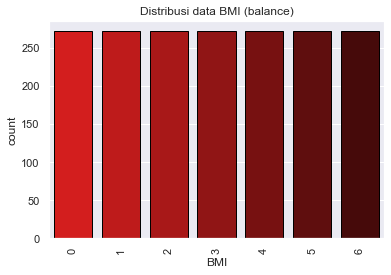

In [29]:
ax = sns.countplot(x = "BMI",data=data_bal, palette="flag",edgecolor="black")
plt.title('Distribusi data BMI (balance)')
sns.set(font_scale=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#plt.savefig('Distribusi_hist.png')

In [30]:
printf = 'Value Unique {}:\n {} \n'

for count, i in enumerate(object_cols):
    val_count = data_bal['{}'.format(i)].value_counts()
    print(count, printf.format(i, val_count))

0 Value Unique Gender:
 1.0    971
0.0    933
Name: Gender, dtype: int64 

1 Value Unique FHWO:
 1.0    1534
0.0     370
Name: FHWO, dtype: int64 

2 Value Unique FAVC:
 1.0    1673
0.0     231
Name: FAVC, dtype: int64 

3 Value Unique CAEC:
 2.0    1576
1.0     233
3.0      48
0.0      47
Name: CAEC, dtype: int64 

4 Value Unique SMOKE:
 0.0    1864
1.0      40
Name: SMOKE, dtype: int64 

5 Value Unique SCC:
 0.0    1814
1.0      90
Name: SCC, dtype: int64 

6 Value Unique CALC:
 2.0    1271
3.0     567
1.0      65
0.0       1
Name: CALC, dtype: int64 

7 Value Unique MTRANS:
 3.0    1419
0.0     417
4.0      53
2.0       8
1.0       7
Name: MTRANS, dtype: int64 

8 Value Unique BMI:
 0    272
1    272
2    272
3    272
4    272
5    272
6    272
Name: BMI, dtype: int64 



In [31]:
drop_col = ['Gender','NCP','SMOKE','MTRANS']
data_bal = data_bal.drop(drop_col, axis=1)
good_label_cols.remove('Gender')
good_label_cols.remove('SMOKE')
good_label_cols.remove('MTRANS')

# EDA Report:

- Jumlah sampel pada setiap kelas mula-mula:
Obesity_Type_I 351, Obesity_Type_III 324, Obesity_Type_I 297, Overweight_Level_I 290, Overweight_Level_II 290, Normal_Weight 287, Insufficient_Weight 272

- Setelah dilakukan balancing didapatkan sampel per kelas adalah 272. Sehingga ukuran data menjadi 1904 sampel.

- Hasil korelasi antar atribut menyatakan bahwa terdapat variabel-variabel yang berkorelasi satu sama lain:
    - BMI dan Weight: 0.91
    - FHWO dan Weight: 0.5
    - Gender dan Height: 0.62
    
- Selain itu, terdapat atribut yang tidak berkorelasi, seperti:
    - SMOKE dan Age: 0.092
    - CAEC dan Height: 0.055
    - NCP dan DAVC: -0.007
    
- Pada target, atribut yang memiliki korelasi rendah adalah: Gender, NCP, SMOKE, dan MTRANS. Sehingga 4 atribut itu akan di drop

# Modeling

## Persiapan Features dan Label

In [32]:
data_preprocess = pd.get_dummies(data_bal, columns = good_label_cols)

In [33]:
target_name = 'BMI'
labels = data_preprocess[target_name]
features = data_preprocess.drop(target_name, axis=1)

In [34]:
features

,Age,Height,Weight,FCVC,CH2O,FAF,TUE,FHWO_0.0,FHWO_1.0,FAVC_0.0,FAVC_1.0,CAEC_0.0,CAEC_1.0,CAEC_2.0,CAEC_3.0,SCC_0.0,SCC_1.0,CALC_0.0,CALC_1.0,CALC_2.0,CALC_3.0
0,18.000000,1.701650,50.157707,1.757466,1.153559,0.833976,1.616045,0,1,0,1,0,0,1,0,1,0,0,0,1,0
1,19.000000,1.564199,42.096062,3.000000,2.456581,1.596576,0.997400,1,0,0,1,0,0,1,0,0,1,0,0,0,1
2,19.434709,1.525691,42.000000,3.000000,1.764055,0.000000,0.560887,1,0,0,1,0,1,0,0,1,0,0,0,1,0
3,19.054938,1.585886,42.541794,2.910345,1.000000,1.461005,0.000000,1,0,1,0,0,1,0,0,0,1,0,0,1,0
4,19.799054,1.743702,54.927529,2.000000,2.847264,1.680844,2.000000,0,1,0,1,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,26.000000,1.640125,111.539494,3.000000,2.625537,0.000000,0.162494,0,1,0,1,0,0,1,0,1,0,0,0,1,0
268,26.000000,1.641098,111.818345,3.000000,2.550570,0.000000,0.204820,0,1,0,1,0,0,1,0,1,0,0,0,1,0
269,25.196214,1.686306,104.572712,3.000000,1.152736,0.319156,1.000000,0,1,0,1,0,0,1,0,1,0,0,0,1,0
270,21.768153,1.764160,133.888629,3.000000,2.325020,1.441791,0.918468,0,1,0,1,0,0,1,0,1,0,0,0,1,0


In [35]:
features_col = features.columns
for i, j in enumerate(features_col):
    print(i, j)

0 Age
1 Height
2 Weight
3 FCVC
4 CH2O
5 FAF
6 TUE
7 FHWO_0.0
8 FHWO_1.0
9 FAVC_0.0
10 FAVC_1.0
11 CAEC_0.0
12 CAEC_1.0
13 CAEC_2.0
14 CAEC_3.0
15 SCC_0.0
16 SCC_1.0
17 CALC_0.0
18 CALC_1.0
19 CALC_2.0
20 CALC_3.0


In [36]:
features = MinMaxScaler().fit_transform(features)

## Fitting Random Forest

In [37]:
%%time
best_accuracy_train = 0.0
best_accuracy_test = 0.0
best_random_state = None
rs_range = np.arange(1,2) # 1 - 20_000
N = len(rs_range)
acc_test_list = np.zeros(N)
test_list = {}

for i in range(N):
    train_features, test_features, train_labels, test_labels = train_test_split(
        features, labels, train_size=0.8, random_state=rs_range[i])

    rfc = RandomForestClassifier(random_state=rs_range[i])
    rfc.fit(train_features, train_labels)

    train_score = rfc.score(train_features, train_labels)
    test_score = rfc.score(test_features, test_labels)
     
    acc_test_list[i] = test_score
    
    if test_score > best_accuracy_test:
        best_accuracy_train = train_score
        best_accuracy_test = test_score
        best_random_state = rs_range[i]
        rfc_best = rfc
        test_list['{}'.format(rs_range[i])] = test_score
        
    if test_score >= 0.9735:
        break

print(f"Train score: {best_accuracy_train:.4f}") 
print(f"Test score: {best_accuracy_test:.4f}") 
print(f"Best random state: {best_random_state}")
print(test_list)

Train score: 1.0000
Test score: 0.9160
Best random state: 1
{'1': 0.916010498687664}
Wall time: 989 ms


In [38]:
max_test = max(acc_test_list)
loc_maxtest = np.where(acc_test_list == max_test)
rs_maxtest = rs_range[loc_maxtest]

print('max_test:', max_test)
print('rs:', rs_maxtest[0])

max_test: 0.916010498687664
rs: 1


Text(0.5, 0, 'Random State')

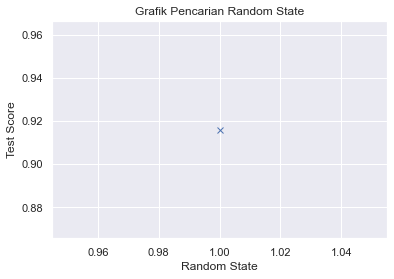

In [39]:
plt.plot(rs_range, acc_test_list, '-x')
plt.title('Grafik Pencarian Random State')
plt.ylabel('Test Score')
plt.xlabel('Random State')

Train score: 1.0000
Test score: 0.9160
Classification Report of Random Forest Classifier : 
               precision    recall  f1-score   support

           0     0.9423    0.9423    0.9423        52
           1     0.7143    0.8491    0.7759        53
           2     0.9216    0.8246    0.8704        57
           3     0.8923    0.9206    0.9062        63
           4     1.0000    0.8909    0.9423        55
           5     1.0000    1.0000    1.0000        55
           6     1.0000    1.0000    1.0000        46

    accuracy                         0.9160       381
   macro avg     0.9244    0.9182    0.9196       381
weighted avg     0.9228    0.9160    0.9177       381



<AxesSubplot:>

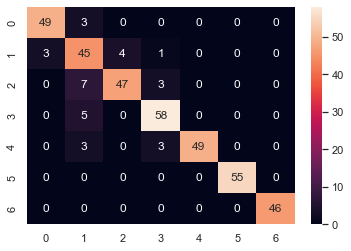

In [40]:
# Fit kembali dengan random state terbaik
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=best_random_state)

rfc_best = RandomForestClassifier(random_state=best_random_state)
rfc_best.fit(train_features, train_labels)

train_score = rfc_best.score(train_features, train_labels)
test_score = rfc_best.score(test_features, test_labels)

rfc_pred = rfc_best.predict(test_features)

cm = confusion_matrix(test_labels,rfc_pred)

report_best = classification_report(test_labels, rfc_pred, digits=4)

print(f"Train score: {train_score:.4f}")
print(f"Test score: {test_score:.4f}")

print('Classification Report of Random Forest Classifier : \n', report_best)
sns.heatmap(cm,annot=True,fmt="d")

## Hyperparameter

### Using RandomSearchCV

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: 
 {'n_estimators': 136, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 10, 'max_depth': 24, 'criterion': 'gini', 'bootstrap': True}

Train Accuracy:  0.9986868023637557
Test Accuracy:  0.937007874015748

               precision    recall  f1-score   support

           0     0.9615    0.9615    0.9615        52
           1     0.8545    0.8868    0.8704        53
           2     0.9057    0.8421    0.8727        57
           3     0.8696    0.9524    0.9091        63
           4     1.0000    0.9273    0.9623        55
           5     1.0000    1.0000    1.0000        55
           6     1.0000    1.0000    1.0000        46

    accuracy                         0.9370       381
   macro avg     0.9416    0.9386    0.9394       381
weighted avg     0.9388    0.9370    0.9372       381

Wall time: 29.2 s


<AxesSubplot:>

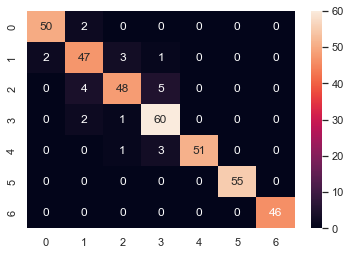

In [41]:
%%time

rfc_h = RandomForestClassifier(random_state = best_random_state)
# Narrow down
param_random = {
    'n_estimators': [int(x) for x in np.linspace(100, 300, num = 12)],
    'max_features': ['sqrt', 'log2', 10],
    'max_depth' : [int(x) for x in np.linspace(10, 50, num = 12)],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2],
    'criterion' : ['gini', 'entropy'],
    'bootstrap' : [True, False]
}

# Create a Randomized Search object
random_search = RandomizedSearchCV(estimator=rfc_h,
                                   param_distributions=param_random,
                                   n_iter = 10,
                                   cv=5, 
                                   verbose=True, 
                                   n_jobs = -1)

# Fit the Randomized Search object to the training data
random_search.fit(train_features, train_labels)

best_param = random_search.best_params_
# Print the best parameters and score
print("Best Parameters: \n", best_param)

# Get the best estimator from Randomized Search
best_rfc = random_search.best_estimator_

# Evaluate the model on train and test sets
train_acc = best_rfc.score(train_features, train_labels)
test_acc = best_rfc.score(test_features, test_labels)

rfc_hyperRS = best_rfc.predict(test_features)
cm_hyper = confusion_matrix(test_labels,rfc_hyperRS)
report_hyperRS = classification_report(test_labels, rfc_hyperRS, digits=4)

print("\nTrain Accuracy: ", train_acc)
print("Test Accuracy: ", test_acc)

print('\n',report_hyperRS)
sns.heatmap(cm_hyper,annot=True,fmt="d")

### Using GridSearchCV

In [42]:
%%time

n_estRS = best_param['n_estimators']
max_dRS = best_param['max_depth']

# Set up the parameter grid to search
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(n_estRS - 30, n_estRS + 30, 7)],
    'max_features': [best_param['max_features']],
    'max_depth' : [int(x) for x in np.linspace(max_dRS - 10, max_dRS + 10, 7)],
    'min_samples_split': [best_param['min_samples_split']],
    'min_samples_leaf': [best_param['min_samples_leaf']],
    'criterion' : [best_param['criterion']],
    'bootstrap' : [best_param['bootstrap']]
}

print(f'\n {param_grid} \n')



 {'n_estimators': [106, 116, 126, 136, 146, 156, 166], 'max_features': [10], 'max_depth': [14, 17, 20, 24, 27, 30, 34], 'min_samples_split': [3], 'min_samples_leaf': [2], 'criterion': ['gini'], 'bootstrap': [True]} 

Wall time: 2 ms


Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 14, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 136}

Train accuracy: 0.9980302035456337
Test accuracy: 0.9343832020997376
              precision    recall  f1-score   support

           0     0.9615    0.9615    0.9615        52
           1     0.8393    0.8868    0.8624        53
           2     0.9038    0.8246    0.8624        57
           3     0.8696    0.9524    0.9091        63
           4     1.0000    0.9273    0.9623        55
           5     1.0000    1.0000    1.0000        55
           6     1.0000    1.0000    1.0000        46

    accuracy                         0.9344       381
   macro avg     0.9392    0.9361    0.9368       381
weighted avg     0.9364    0.9344    0.9345       381



<AxesSubplot:>

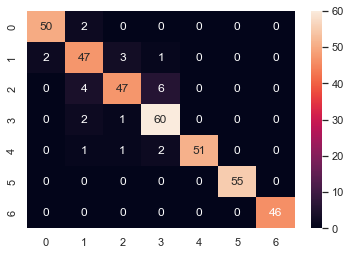

In [43]:

rfc_GS = RandomForestClassifier(random_state = best_random_state)

# Create GridSearchCV object with 5-fold cross validation
CV_rfc = GridSearchCV(estimator=rfc_GS, 
                      param_grid=param_grid, 
                      cv=5,
                     n_jobs = -1,
                     verbose = True,
                     )

# Fit the GridSearchCV object to the data
CV_rfc.fit(train_features, train_labels)

# Print the best hyperparameters found
print('Best hyperparameters:', CV_rfc.best_params_)

best_model = CV_rfc.best_estimator_

train_preds = best_model.predict(train_features)
test_preds = best_model.predict(test_features)

train_acc = accuracy_score(train_labels, train_preds)
test_acc = accuracy_score(test_labels, test_preds)

cm_hyperGS = confusion_matrix(test_labels,test_preds)
report_hyperGS = classification_report(test_labels, test_preds, digits=4)

print('\nTrain accuracy:', train_acc)
print('Test accuracy:', test_acc)
print(report_hyperGS)
sns.heatmap(cm_hyperGS,annot=True,fmt="d")